In [13]:
import os

base_dir = 'dataset'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
classes = os.listdir(f'{base_dir}/train')
print(classes)

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['test', 'train', 'validation']

Contents of train directory:
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']

Contents of validation directory:
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [2]:

import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [3]:

import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(36, activation='softmax')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [5]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# from tensorflow.keras.optimizers import RMSprop

# model.compile(optimizer=RMSprop(learning_rate=0.001),
#               loss=tf.keras.losses.CategoricalCrossentropy(),
#               metrics = ['accuracy'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )   #standarixzation btwn 0-1
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150,150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode='categorical',
                                                         target_size=(150,150))

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [7]:
history = model.fit(
            train_generator,
            epochs=8,
            validation_data=validation_generator,
            verbose=2)

Epoch 1/8


C:\Users\hjain\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


156/156 - 168s - loss: 3.0459 - accuracy: 0.1499 - val_loss: 2.0840 - val_accuracy: 0.3903 - 168s/epoch - 1s/step
Epoch 2/8
156/156 - 161s - loss: 2.1703 - accuracy: 0.3551 - val_loss: 1.2972 - val_accuracy: 0.6467 - 161s/epoch - 1s/step
Epoch 3/8
156/156 - 160s - loss: 1.6462 - accuracy: 0.5117 - val_loss: 0.8052 - val_accuracy: 0.8177 - 160s/epoch - 1s/step
Epoch 4/8
156/156 - 161s - loss: 1.0130 - accuracy: 0.6912 - val_loss: 0.4437 - val_accuracy: 0.9003 - 161s/epoch - 1s/step
Epoch 5/8
156/156 - 160s - loss: 0.4696 - accuracy: 0.8597 - val_loss: 0.4530 - val_accuracy: 0.9060 - 160s/epoch - 1s/step
Epoch 6/8
156/156 - 160s - loss: 0.2529 - accuracy: 0.9284 - val_loss: 0.3635 - val_accuracy: 0.9402 - 160s/epoch - 1s/step
Epoch 7/8
156/156 - 162s - loss: 0.1435 - accuracy: 0.9660 - val_loss: 0.3103 - val_accuracy: 0.9544 - 162s/epoch - 1s/step
Epoch 8/8
156/156 - 161s - loss: 0.0875 - accuracy: 0.9833 - val_loss: 0.3574 - val_accuracy: 0.9544 - 161s/epoch - 1s/step


In [8]:
from tensorflow.keras.models import save_model

# Assuming your trained model object is named 'model'
model.save('C:/Users/hjain/Downloads/Food_dataset/saved_model.h5')  # Replace 'saved_model.h5' with the desired filename for the saved model

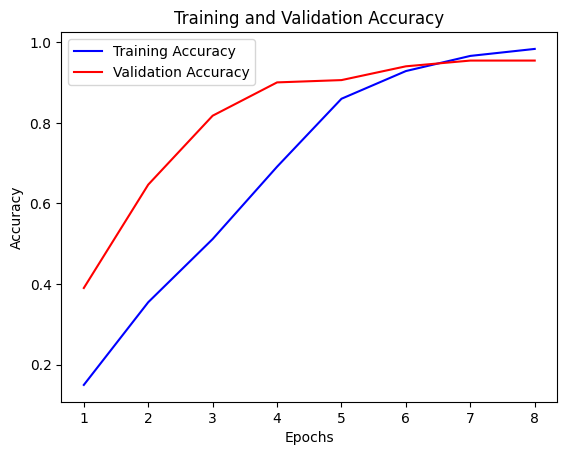

In [9]:
import matplotlib.pyplot as plt

# Access the training and validation accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Generate the x-axis values (epochs)
epochs = range(1, len(training_accuracy) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


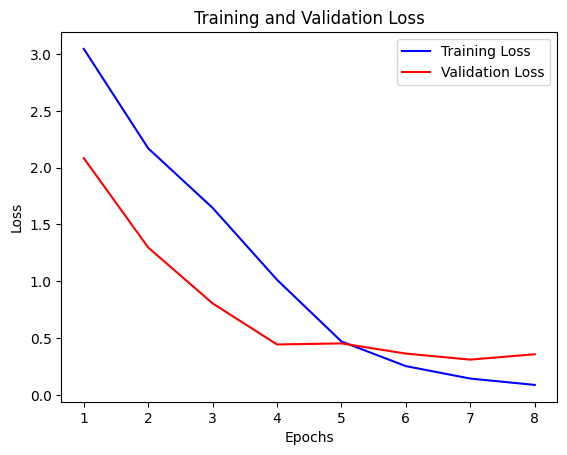

In [10]:
import matplotlib.pyplot as plt

# Access the training and validation loss values from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Generate the x-axis values (epochs)
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
import numpy as np
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model = load_model('C:/Users/hjain/Downloads/Food_dataset/saved_model.h5')  # Replace 'your_model.h5' with the path to your trained model file

# Define your class labels here
class_labels = classes # Replace with your actual class labels

# Specify the directory path where the images are located
images_dir = 'C:/Users/hjain/Downloads/Food_dataset/dataset/test/orange'  # Replace 'path/to/images' with the actual directory path

# Loop through the images in the directory
for filename in os.listdir(images_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust file extensions if necessary
        image_path = os.path.join(images_dir, filename)

        # Load and preprocess the image
        img = load_img(image_path, target_size=(150, 150))
        x = img_to_array(img)
        x /= 255
        x = np.expand_dims(x, axis=0)

        # Make predictions
        predictions = model.predict(x)
        class_index = np.argmax(predictions[0])
        predicted_class = class_labels[class_index]

        print(f"{filename} is classified as: {predicted_class}")


1/1 [==============================] - 0s 145ms/step
Image_1.png is classified as: orange
1/1 [==============================] - 0s 49ms/step
Image_10.png is classified as: orange
1/1 [==============================] - 0s 48ms/step
Image_2.jpg is classified as: orange
1/1 [==============================] - 0s 48ms/step
Image_3.jpg is classified as: orange
1/1 [==============================] - 0s 48ms/step
Image_4.jpg is classified as: orange
1/1 [==============================] - 0s 49ms/step
Image_5.jpg is classified as: orange
1/1 [==============================] - 0s 52ms/step
Image_6.jpg is classified as: orange
1/1 [==============================] - 0s 58ms/step
Image_7.jpg is classified as: orange
1/1 [==============================] - 0s 55ms/step
Image_9.jpg is classified as: orange
